## 1) Packages and Data

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import math
from numpy.random import choice
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from collections import namedtuple, deque

import yfinance as yf

Get Market Data

In [2]:
ticker_symbol = "^GSPC" # ticker for s&p500

sp500 = yf.Ticker(ticker_symbol) # data for s&p500

hist = sp500.history(period="15y")

print(hist)

                                  Open         High          Low        Close  \
Date                                                                            
2009-06-04 00:00:00-04:00   932.489990   942.469971   929.320007   942.460022   
2009-06-05 00:00:00-04:00   945.669983   951.690002   934.130005   940.090027   
2009-06-08 00:00:00-04:00   938.119995   946.330017   926.440002   939.140015   
2009-06-09 00:00:00-04:00   940.349976   946.919983   936.150024   942.429993   
2009-06-10 00:00:00-04:00   942.729980   949.770020   927.969971   939.150024   
...                                ...          ...          ...          ...   
2024-05-28 00:00:00-04:00  5315.910156  5315.910156  5280.890137  5306.040039   
2024-05-29 00:00:00-04:00  5278.729980  5282.270020  5262.700195  5266.950195   
2024-05-30 00:00:00-04:00  5259.770020  5260.209961  5222.100098  5235.479980   
2024-05-31 00:00:00-04:00  5243.209961  5280.330078  5191.680176  5277.509766   
2024-06-03 00:00:00-04:00  5

Convert Data to CSV

In [3]:
#hist.to_csv("sp500_historical.csv")

Put CSV Data into Pandas Dataframe

In [4]:
csv = 'sp500_historical.csv'
df = pd.read_csv(csv,index_col=0) # use col 0 as row labels
type(df)

pandas.core.frame.DataFrame

## 2) Explore Data

In [5]:
df.shape

(3777, 7)

In [6]:
df.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-06-01 00:00:00-04:00,923.260010,947.770020,923.260010,942.869995,6370440000,0.0,0.0
2009-06-02 00:00:00-04:00,942.869995,949.380005,938.460022,944.739990,5987340000,0.0,0.0
2009-06-03 00:00:00-04:00,942.510010,942.510010,923.849976,931.760010,5323770000,0.0,0.0
2009-06-04 00:00:00-04:00,932.489990,942.469971,929.320007,942.460022,5352890000,0.0,0.0
2009-06-05 00:00:00-04:00,945.669983,951.690002,934.130005,940.090027,5277910000,0.0,0.0


Get statistics of data

In [7]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3777.000000,3777.000000,3777.000000,3777.000000,3.777000e+03,3777.0,3777.0
mean,2544.960353,2558.736689,2530.276415,2545.557230,3.980558e+09,0.0,0.0
std,1156.828114,1162.996295,1150.309040,1156.939522,9.733658e+08,0.0,0.0
min,879.570007,883.570007,869.320007,879.130005,1.025000e+09,0.0,0.0
25%,1521.380005,1530.939941,1515.930054,1525.199951,3.384080e+09,0.0,0.0
50%,2200.649902,2204.800049,2194.510010,2201.719971,3.816660e+09,0.0,0.0
75%,3365.870117,3381.010010,3341.020020,3363.000000,4.378570e+09,0.0,0.0
max,5340.259766,5341.879883,5302.399902,5321.410156,1.061781e+10,0.0,0.0


Plot stock movement

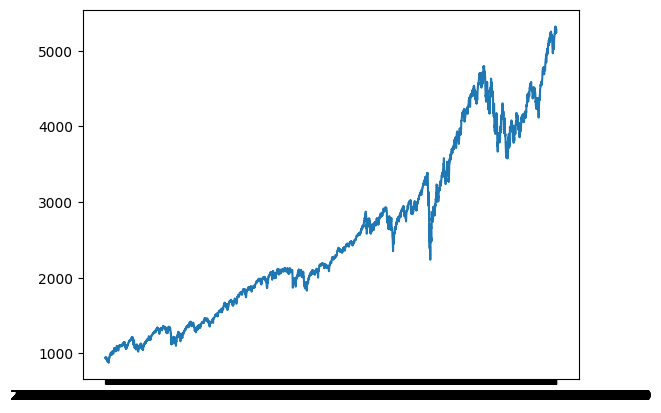

In [8]:
plt.plot(df.index, df['Close'])
plt.show()

Data Cleaning

In [9]:
print('Null Values =', df.isnull().values.any()) # check for null values

Null Values = False


In [10]:
df = df.fillna(method='bfill') # if there are null values, replace them with the next value in the dataset

/var/folders/pd/9gc451qn4pq79vrqt_r9xlfr0000gn/T/ipykernel_76061/3377758463.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill') # if there are null values, replace them with the next value in the dataset


In [11]:
df.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-06-01 00:00:00-04:00,923.260010,947.770020,923.260010,942.869995,6370440000,0.0,0.0
2009-06-02 00:00:00-04:00,942.869995,949.380005,938.460022,944.739990,5987340000,0.0,0.0


Remove Last Two Colums

In [12]:
cols = df.columns.to_list() # converts columns of df into a list
drop = cols[-2:] # get last two columns of df
df = df.drop(columns=drop) # delete those columns

df.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2009-06-01 00:00:00-04:00,923.260010,947.770020,923.260010,942.869995,6370440000
2009-06-02 00:00:00-04:00,942.869995,949.380005,938.460022,944.739990,5987340000


## 3) Build Datasets

Split Dataset

In [13]:
X = list(df['Close']) # create a list of closing prices from df
X = [float(x) for x in X] # convert each element to a float

In [14]:
print(X[0:10])

[942.8699951171876, 944.739990234375, 931.760009765625, 942.4600219726562, 940.0900268554688, 939.1400146484376, 942.4299926757812, 939.1500244140624, 944.8900146484376, 946.2100219726562]


In [15]:
from sklearn.model_selection import train_test_split
test_size = 0.2
X_train, x_test = train_test_split(X, test_size=test_size, shuffle=False) # use test size 20%

In [16]:
print(X_train[0:10])

[942.8699951171876, 944.739990234375, 931.760009765625, 942.4600219726562, 940.0900268554688, 939.1400146484376, 942.4299926757812, 939.1500244140624, 944.8900146484376, 946.2100219726562]


## 4) Build Model

Memory Class: Cyclic Buffer of bounded size that holds the transitions observed recently. It also implements a sample() method for selecting a random batch of transitions for training

In [82]:
class Memory():
    def __init__(self, capacity=10000):
        self.memory = deque([], maxlen=capacity)
    def push(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done)) # overwrites old 
    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)
    def __len__(self):
        return len(self.memory)

Neural Network Class: Create the Q-Network used in the DQN algorithm to approximate the Q-Value function

In [83]:
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 8)
        self.output = nn.Linear(8, action_size)

        self.lr = 0.001
        self.loss_fn = nn.MSELoss()
        self.optimizer = optim.Adam(self.parameters(), lr=self.lr)

        #self.device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
        self.device = 'cpu'
        self.to(self.device)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.output(x)
        return x
    
    def _train(self, y, y_pred): 
        self.train()
        self.optimizer.zero_grad()
        loss = self.loss_fn(y_pred, y) # we performed a forward pass in exp_replay, so use the results from that as y_pred
        loss.backward()
        self.optimizer.step()
        return loss.item()
        

Agent Class: Define an Agent that is designed to act as a reinforcement learning agent for stock trading using a neural network. The agent can buy, sell or hold a stock. It learns from its experiences over time

In [84]:
class Agent():
    def __init__(self, state_size, is_eval=False, model_name=""):
        super(Agent, self).__init__()
        self.state_size = state_size 
        self.action_size = 3
        self.memory = Memory(1000)
        self.budget = 5000
        self.inventory = []
        self.is_eval = is_eval
        self.model_name = model_name
        self.gamma = 0.95
        self.epsilon = 1.0
        self.eps_min = 0.01
        self.eps_dec = 0.9

        self.model = DQN(self.state_size, self.action_size)
        if is_eval:
            self.model = torch.load(model_name)
            self.model.eval()

    # CHOOSE ACTION 
    # epsilon greedy policy
    def act(self, state):
        if not self.is_eval and random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        state = torch.tensor(state, dtype=torch.float).to(self.model.device)
        actions = self.model.forward(state).detach().numpy()
        return np.argmax(actions[0])

    # EXPERIENCE REPLAY
    def expReplay(self, batch_size):
        if self.memory.__len__() < batch_size:
            return
        minibatch = self.memory.sample(batch_size)
        for state, action, reward, next_state, done in minibatch:
            state = torch.tensor(state, dtype=torch.float).to(self.model.device) 
            next_state = torch.tensor(next_state, dtype=torch.float).to(self.model.device) 
            target = reward
            if not done:
                target = reward + self.gamma * torch.max(self.model.forward(next_state)[0])

            target_f = self.model.forward(state)
            y_pred = torch.clone(target_f) # keep this for the training function so we dont need to perform another forward pass
            target_f[0][action] = target

            self.model._train(target_f, y_pred)
        if self.epsilon > self.eps_min:
            self.epsilon -= self.eps_dec

Helper Functions

In [85]:
def formatPrice(n):
    return ("-$" if n < 0 else "$") + "{0:,.2f}".format(abs(n))

def sigmoid(x):
    if x >= 0:
        return 1 / (1 + math.exp(-x))
    else:
        return 1 / (1 + math.exp(x))

def getState(data, t, n):
    d = t - n + 1 
    block = data[d:t+1] if d >= 0 else -d * [data[0]] + data[0:t + 1]
    res = [] 
    for i in range(n-1): 
        res.append(sigmoid(block[i+1]-block[i])) 
    return np.array([res]) 

def plot_behavior(data_input, states_buy, states_sell, profit, cost):
    plt.figure(figsize=(15,5))
    plt.plot(data_input, marker=6, markersize=10, color='b', label='Buying Signal', markevery=states_buy)
    plt.plot(data_input, marker=7, markersize=10, color='r', label='Selling Signal', markevery=states_sell)
    plt.plot(data_input, color='g', lw=1.) 
    plt.legend() 
    plt.show() 
    print('Total Gains: ' + formatPrice(profit))
    print("Total Cost: " + formatPrice(cost))
    if cost != 0:
        print('Percent Return: Gains/Cost = %.2f%%' %(profit*100/cost))
    print("--------------------------------")
    print()

def plot_average_reward_per_ep(total_rewards, epochs):
    average_rewards_per_episode = [sum(total_rewards[:i+1])/(i+1) for i in range(len(total_rewards))]
    plt.plot(range(epochs+1), average_rewards_per_episode)
    plt.xlabel('Epoch')
    plt.ylabel('Average Reward')
    plt.title('Average Reward per Episode Over Time')
    plt.show()

def plot_avg_pred_q_vals(q_vals, epochs):
    plt.plot(range(epochs+1), q_vals)
    plt.xlabel('Epoch')
    plt.ylabel('Average Q-Value')
    plt.title('Average Predicted Q-Values Over Time')
    plt.show()

def collect_fixed_states(data, window_size, num_states=1000):
    fixed_states = []
    l = len(data)-1
    while len(fixed_states)<num_states:
        t = np.random.randint(0, l-window_size+1)
        state = getState(data, t, window_size+1)
        fixed_states.append(state)
    return fixed_states

## 5) Train Model

Train the Agent

In [ ]:
window_size = 1
agent = Agent(window_size)
data = X_train
l = len(data)-1
batch_size = 32
epochs = 10
total_rewards = []
avg_max_q_vals = []
overspending_reward = -1 # reward if agent buys when it cant afford
invalid_sell_reward = -0.1 # reward if agent tries to sell when it has no inventory
sell_reward_mult = 2 # multiplier of reward for selling
fixed_states = collect_fixed_states(data, window_size)
for e in range(epochs+1): 
    print("Epoch " + str(e) + "/" + str(epochs)) 
    state = getState(data, 0, window_size + 1) 
    total_profit = 0 
    agent.inventory = []
    agent.budget = 5000 
    states_buy = []
    states_sell = [] 
    cost = 0 # total cost of buying stocks

    for t in range(l): 
        action = agent.act(state)     
        next_state = getState(data, t+1, window_size+1) 
        reward = 0

        if action == 1: # if the action is buy and you can afford
            agent.inventory.append(data[t]) # add stock to inventory
            #total_profit -= data[t] # subtract cost from total profit
            states_buy.append(t) # add timestep to bought states
            cost += data[t] # add cost of stock to total cost
            #agent.budget -= data[t] # subtract cost of stock from budget
            # if agent.budget <= 0:
            #     reward = overspending_reward

        elif action == 2: # if the action is sell and you have stock to sell
            if len(agent.inventory) > 0:
                bought_price = agent.inventory.pop(0) # get the price of the earliest point you bought
                reward = (data[t] - bought_price)*sell_reward_mult # get reward
                total_profit += data[t] - bought_price  # add selling price to profit
                states_sell.append(t) # add timestep to sold states
                #agent.budget += data[t] # add the profit to your budget
            # elif len(agent.inventory) <= 0:
            #     reward = invalid_sell_reward

        done = True if t == l - 1 else False 
        agent.memory.push(state, action, reward, next_state, done) 
        state = next_state 
        agent.expReplay(batch_size)
        if done: 
            print("--------------------------------")
            total_rewards.append(total_profit)
            plot_behavior(data, states_buy, states_sell, total_profit, cost)        
    # max_q_values = []
    # for fixed_state in fixed_states:
    #     fixed_state = torch.tensor(fixed_state, dtype=torch.float).to(agent.model.device)
    #     q_values = agent.model.forward(fixed_state).detach().numpy()
    #     max_q_values.append(np.max(q_values))
    # avg_max_q_vals.append(np.mean(max_q_values))
        
    path = "models/model_ep"+str(e)+".pth"
    torch.save(agent.model, path)

plot_average_reward_per_ep(total_rewards, epochs)
#plot_avg_pred_q_vals(avg_max_q_vals, epochs)

## Results

In [ ]:
print("Train Optimizer's state_dict:")
for var_name in agent.model.optimizer.state_dict():
    print(var_name, "\t", agent.model.optimizer.state_dict()[var_name])

In [ ]:
test_data = x_test
l_test = len(test_data) - 1
window_size = 1
is_eval = True

e_agent = Agent(window_size, is_eval, "models/model_ep8.pth")

state = getState(test_data, 0, window_size + 1)
total_profit = 0
states_buy_test = []
states_sell_test = []
holding_reward = 0.1
cost = 0 # total cost of buying stocks
budget = 5000 # initial starting budget

In [ ]:
print("Test Optimizer's state_dict:")
for var_name in e_agent.model.optimizer.state_dict():
    print(var_name, "\t", e_agent.model.optimizer.state_dict()[var_name])

In [ ]:
for t in range(l_test): 
    action = e_agent.act(state)     
    next_state = getState(test_data, t+1, window_size+1) 
    reward = 0
    if action == 1 and test_data[t] <= budget: # if the action is buy and you can afford
        e_agent.inventory.append(test_data[t]) # add stock to inventory
        total_profit -= test_data[t] # subtract cost from total profit
        states_buy.append(t) # add timestep to bought states
        cost += test_data[t] # add cost of stock to total cost
        budget -= test_data[t] # subtract cost of stock from budget
        print("Buy: " + formatPrice(test_data[t]))
    elif action == 2 and len(e_agent.inventory) > 0: # if the action is sell and you have stock to sell
        bought_price = e_agent.inventory.pop(0) # get the price of the earliest point you bought
        reward = test_data[t] - bought_price # get reward
        total_profit += test_data[t] # add selling price to profit
        states_sell.append(t) # add timestep to sold states
        budget += test_data[t] # add the profit to your budget
        print("Sell: " + formatPrice(test_data[t]))
        print("Profit: " + formatPrice(test_data[t] - bought_price))
    done = True if t == l_test - 1 else False 
    e_agent.memory.push(state, action, reward, next_state, done) 
    state = next_state 
    if done: 
        print("--------------------------------")
        plot_behavior(test_data,states_buy_test, states_sell_test, total_profit, cost)